# 
- **Answer Set** : NO. 02
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 96413315

Hamming Code in AWGN Channel

In [1]:
clear all
close all
clc
iteration=10^5;
snrdb=[-4:10];
simsnr=10.^(snrdb/10);
erpr=zeros(1,length(snrdb))


genmattp=[1 1 0 1;1 0 1 1;1 0 0 0;0 1 1 1;0 1 0 0;0 0 1 0;0 0 0 1];
gener=genmattp'

cw1=mod(([0 0 0 0]*gener),2);
cw2=mod([0 0 0 1]*gener,2);
cw3=mod([0 0 1 0]*gener,2);
cw4=mod([0 0 1 1]*gener,2);
cw5=mod([0 1 0 0]*gener,2);
cw6=mod([0 1 0 1]*gener,2);
cw7=mod([0 1 1 0]*gener,2);
cw8=mod([0 1 1 1]*gener,2);
cw9=mod([1 0 0 0]*gener,2);
cw10=mod([1 0 0 1]*gener,2);
cw11=mod([1 0 1 0]*gener,2);
cw12=mod([1 0 1 1]*gener,2);
cw13=mod([1 1 0 0]*gener,2);
cw14=mod([1 1 0 1]*gener,2);
cw15=mod([1 1 1 0]*gener,2);
cw16=mod([1 1 1 1]*gener,2);
codebook=[cw1;cw2;cw3;cw4;cw5;cw6;cw7;cw8;cw9;cw10;cw11;cw12;cw13;cw14;cw15;cw16]
[ro col]=size(codebook)
weightmat=zeros(1,ro);
sent=2.*cw1-1


erpr =

     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0


gener =

     1     1     1     0     0     0     0
     1     0     0     1     1     0     0
     0     1     0     1     0     1     0
     1     1     0     1     0     0     1


codebook =

     0     0     0     0     0     0     0
     1     1     0     1     0     0     1
     0     1     0     1     0     1     0
     1     0     0     0     0     1     1
     1     0     0     1     1     0     0
     0     1     0     0     1     0     1
     1     1     0     0     1     1     0
     0     0     0     1     1     1     1
     1     1     1     0     0     0     0
     0     0     1     1     0     0     1
     1     0     1     1     0     1     0
     0     1     1     0     0     1     1
     0     1     1     1     1     0     0
     1     0     1     0     1     0     1
     0     0     1     0     1     1     0
     1     1     1     1     1     1     1


ro =

    16



erpr =

   1.0e-03 *

  Columns 1 through 13

    0.2300    0.1500    0.0300    0.0100         0         0         0         0         0         0         0         0         0

  Columns 14 through 15

         0         0




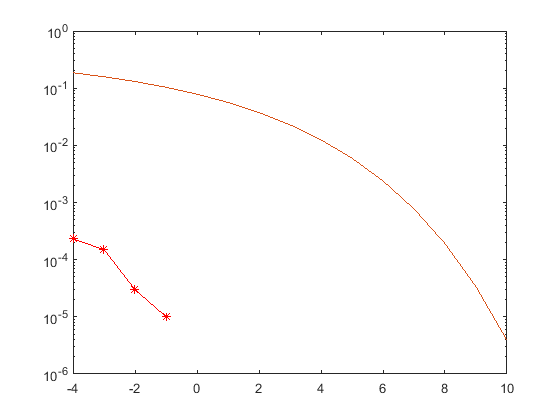

In [3]:
for j=1:length(snrdb)
 snr=10^(snrdb(j)/10);
 count=0;
 for i=1:iteration
 noise=randn(1,length(sent));
 detected=zeros(1,length(sent));
 received=sqrt(.5).*noise+ sqrt(snr).*sent;
 for kk=1:length(sent)
 
 if received(kk) >=0
 detected(kk)=1;
 else 
 detected(kk)=0;
 
 end
 end
 for nn=1:ro
 %dtection=detected
 weightmat(nn)=sum(xor(codebook(nn,:),detected));
 end
 [value,index]=min(weightmat);
 if codebook(index,:)~=cw1
 count=count+1;
 end
 
 end
 
 erpr(j)=count/iteration;
end
erpr
semilogy(snrdb,erpr,'-r*') 
hold on
qf=qfunc(sqrt(2.*simsnr));
semilogy(snrdb,qf)
